#Análise Exploratória dos Dados (EDA)

## Importando Bibliotecas e Dataset

In [ ]:
#Importa bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Carrega o conjunto de dados
df = pd.read_csv('Private_data.csv')

# Exibe as primeiras e últimas linhas do conjunto de dados
df_head_tail = pd.concat([df.head(), df.tail()])
df_head_tail


,Unnamed: 0,NAME OF THE STUDENT,UNIVERSITY,PROGRAM NAME,Specialisation,SEMESTER,Domain,GENERAL MANAGEMENT SCORE (OUT of 50),Domain Specific SCORE (OUT 50),TOTAL SCORE (OUT of 100),RANK,PERCENTILE
0,0,Camila Wood,"Stanford University, USA",B.Com,Honours,5th,Finance,50,50,100,1,1.000000
1,1,Alexander Thompson,"Stanford University, USA",B.Com,Financial Services,5th,Finance,50,50,100,2,0.993377
2,2,Liam Taylor,"Harvard University, USA",B.Com,Accounting Analytics,5th,BA,50,50,100,3,0.986755
3,3,Evelyn Jenkins,"Stanford University, USA",B.Com,Honours,5th,Finance,49,50,99,4,0.980132
4,4,Michael Jackson,"Harvard University, USA",MBA,International Business,3rd,IB,50,49,99,5,0.973510
146,146,Avery Lewis,"Stanford University, USA",BBA,Financial Services,5th,Finance,16,12,28,147,0.033113
147,147,Ethan Martin,"Stanford University, USA",BBA,International Business,5th,Generic,11,13,24,148,0.026490
148,148,Nicholas Rodriguez,"Harvard University, USA",MBA,International Business,3rd,IB,16,8,24,149,0.019868
149,149,Samuel Perez,"Stanford University, USA",BBA,International Business,5th,IB,12,8,20,150,0.013245
150,150,Emily Lee,"Massachusetts Institute of Technology (MIT), USA",BBA,Digital Marketing,5th,DM,4,1,5,151,0.006623


## Limpeza e Pré-processamento

In [ ]:
# Verifica dados faltantes
missing_data = df.isnull().sum()

missing_data


Unnamed: 0                              0
NAME OF THE STUDENT                     0
UNIVERSITY                              0
PROGRAM NAME                            0
Specialisation                          0
SEMESTER                                0
Domain                                  0
GENERAL MANAGEMENT SCORE (OUT of 50)    0
Domain Specific SCORE (OUT 50)          0
TOTAL SCORE (OUT of 100)                0
RANK                                    0
PERCENTILE                              0
dtype: int64

Não há dados faltantes em nenhuma das colunas do conjunto de dados

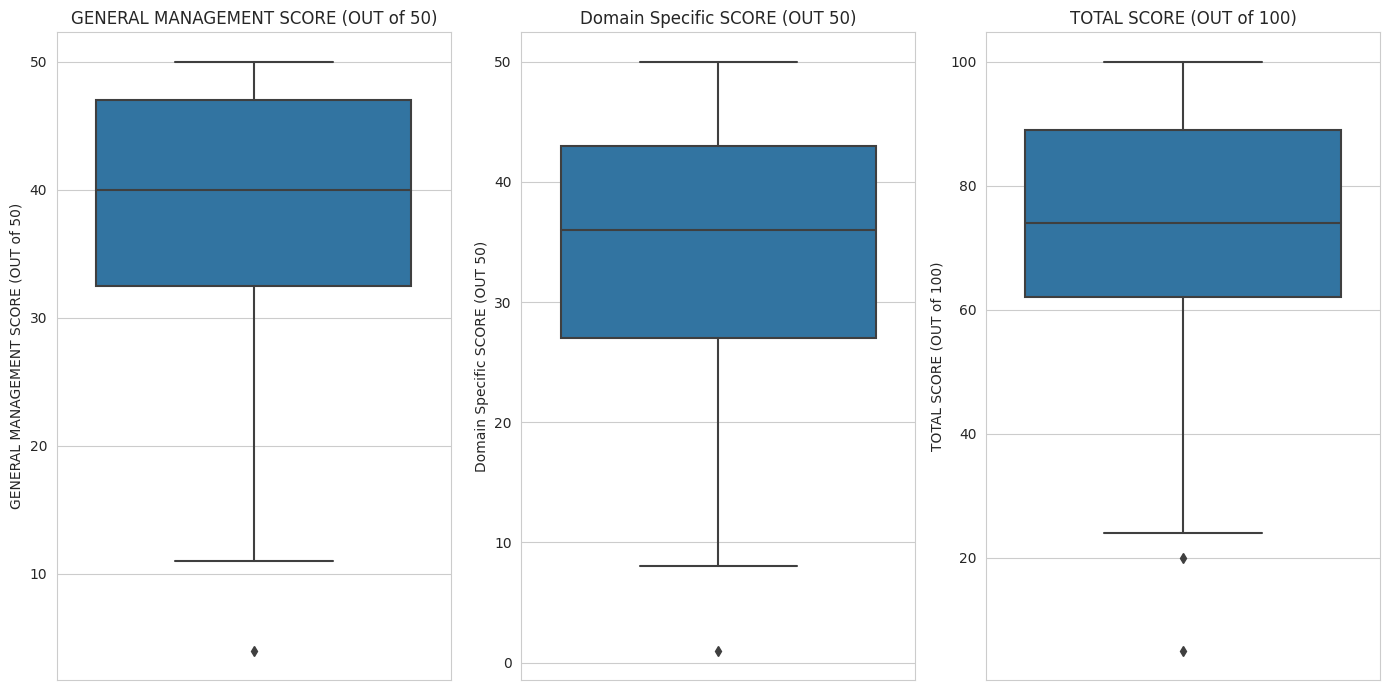

In [ ]:
# Define o estilo dos gráficos
sns.set_style("whitegrid")

# Cria boxplots para as colunas de pontuação
score_columns = ['GENERAL MANAGEMENT SCORE (OUT of 50)', 'Domain Specific SCORE (OUT 50)', 'TOTAL SCORE (OUT of 100)']

plt.figure(figsize=(14, 7))
for idx, column in enumerate(score_columns, 1):
    plt.subplot(1, 3, idx)
    sns.boxplot(y=df[column])
    plt.title(column)
    plt.tight_layout()

plt.show()


* Para a coluna GENERAL MANAGEMENT SCORE (OUT of 50), vemos alguns pontos
abaixo do limite inferior, o que indica possíveis outliers.

* Para a coluna Domain Specific SCORE (OUT 50), também vemos alguns pontos abaixo do limite inferior, o que indica possíveis outliers.

* A coluna TOTAL SCORE (OUT of 100) parece ter uma distribuição mais uniforme, mas ainda há alguns possíveis outliers na extremidade inferior.

Estes outliers podem ser estudantes que tiveram um desempenho particularmente baixo nas avaliações, ou podem ser erros de entrada de dados. Você pode optar por investigar esses pontos mais detalhadamente ou tomar decisões sobre como tratá-los (por exemplo, mantê-los, removê-los ou substituí-los).

In [ ]:
# Verifica os tipos de dados das colunas
data_types = df.dtypes

data_types


Unnamed: 0                                int64
NAME OF THE STUDENT                      object
UNIVERSITY                               object
PROGRAM NAME                             object
Specialisation                           object
SEMESTER                                 object
Domain                                   object
GENERAL MANAGEMENT SCORE (OUT of 50)      int64
Domain Specific SCORE (OUT 50)            int64
TOTAL SCORE (OUT of 100)                  int64
RANK                                      int64
PERCENTILE                              float64
dtype: object

* As colunas de pontuação, rank e percentil são numéricas (int64 ou float64).

* As colunas de informações sobre os alunos, como nome, universidade, programa, especialização, etc., são do tipo objeto

## Análise Descritiva

In [ ]:
# Calcula estatísticas descritivas para as colunas de pontuação
descriptive_stats = df[score_columns].describe()

descriptive_stats


,GENERAL MANAGEMENT SCORE (OUT of 50),Domain Specific SCORE (OUT 50),TOTAL SCORE (OUT of 100)
count,151.000000,151.000000,151.000000
mean,37.993377,33.635762,71.629139
std,10.734056,11.866751,21.200823
min,4.000000,1.000000,5.000000
25%,32.500000,27.000000,62.000000
50%,40.000000,36.000000,74.000000
75%,47.000000,43.000000,89.000000
max,50.000000,50.000000,100.000000


1. **GENERAL MANAGEMENT SCORE (OUT of 50)**

* **Média:** Aproximadamente 38.
* **Desvio padrão:** **negrito** Aproximadamente 10.73, indicando uma variação significativa nas pontuações.
* **Mínimo: 4**
* **Mediana (50%):** 40, indicando que a metade dos alunos obteve uma pontuação de 40 ou mais.
* **Máximo:** 50

2. **Domain Specific SCORE (OUT 50)**

* **Média:** Aproximadamente 33.64.
* **Desvio padrão:** Aproximadamente 11.87, indicando uma variação significativa nas pontuações.
* **Mínimo:** 1
* **Mediana (50%):** 36.
* **Máximo:** 50

3. **TOTAL SCORE (OUT of 100)**

* **Média:** Aproximadamente 71.63.
* **Desvio padrão:** Aproximadamente 21.20, indicando uma variação significativa nas pontuações totais.
* **Mínimo:** 5
* **Mediana (50%):** 74, indicando que a metade dos alunos obteve uma pontuação total de 74 ou mais.
* **Máximo: 100**

## Visualização

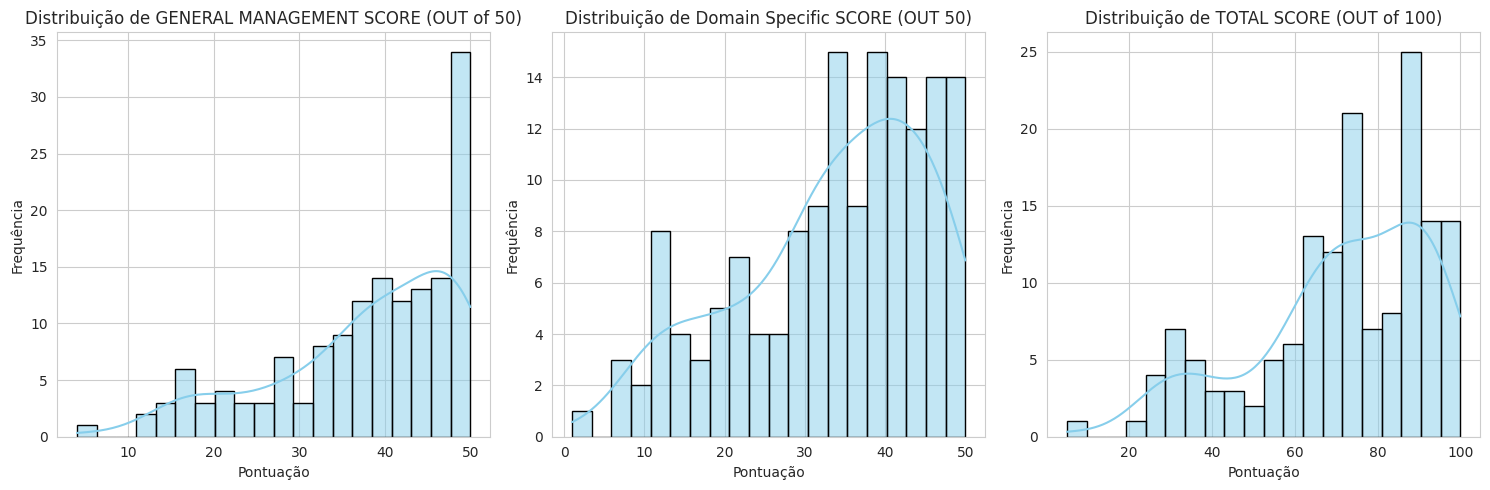

In [ ]:
# Cria histogramas para as colunas de pontuação
plt.figure(figsize=(15, 5))

for idx, column in enumerate(score_columns, 1):
    plt.subplot(1, 3, idx)
    sns.histplot(df[column], bins=20, kde=True, color='skyblue', edgecolor='black')
    plt.title(f'Distribuição de {column}')
    plt.xlabel('Pontuação')
    plt.ylabel('Frequência')
    plt.tight_layout()

plt.show()


1. **GENERAL MANAGEMENT SCORE (OUT of 50):**

* A maioria dos alunos obteve pontuações entre 40 e 50.
* Há um número significativo de alunos com pontuações entre 30 e 40.
* Há uma pequena quantidade de alunos com pontuações muito baixas, o que pode corresponder aos outliers observados anteriormente.

2. **Domain Specific SCORE (OUT 50):**

* A distribuição é um pouco mais espalhada em comparação com as pontuações de gerenciamento geral.
* Muitos alunos obtiveram pontuações entre 30 e 50.
* Assim como no caso anterior, há alguns alunos com pontuações muito baixas.

3. **TOTAL SCORE (OUT of 100)**:

* A distribuição das pontuações totais parece um pouco normal, com a maioria dos alunos obtendo pontuações entre 60 e 90.
* Novamente, há alguns alunos com pontuações muito baixas, que podem ser os mesmos alunos com baixas pontuações nas seções individuais.

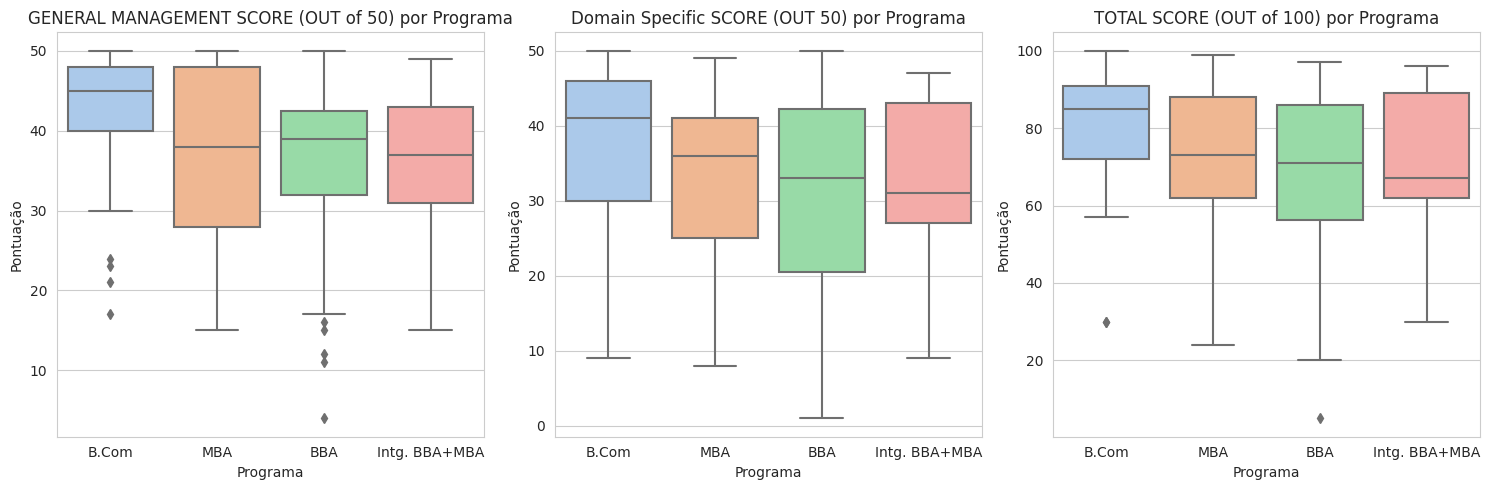

In [ ]:
# Compara as médias de pontuação entre os programas BBA e MBA
plt.figure(figsize=(15, 5))

for idx, column in enumerate(score_columns, 1):
    plt.subplot(1, 3, idx)
    sns.boxplot(x=df['PROGRAM NAME'], y=df[column], palette='pastel')
    plt.title(f'{column} por Programa')
    plt.xlabel('Programa')
    plt.ylabel('Pontuação')
    plt.tight_layout()

plt.show()


1. **GENERAL MANAGEMENT SCORE (OUT of 50):**

* Os alunos do programa MBA tendem a ter uma mediana de pontuação ligeiramente mais alta em comparação com os alunos do BBA.
* A distribuição das pontuações do BBA é mais ampla, indicando uma maior variação nas pontuações dos alunos desse programa.

2. **Domain Specific SCORE (OUT 50):**

* Novamente, os alunos do programa MBA tendem a ter uma mediana de pontuação ligeiramente mais alta.
* A distribuição para ambos os programas é relativamente semelhante nesta seção.

3. **TOTAL SCORE (OUT of 100):**

* O padrão é consistente com as seções individuais, com os alunos do programa MBA tendo uma mediana de pontuação ligeiramente mais alta.
* A distribuição das pontuações do BBA é mais ampla, assim como nas pontuações de gerenciamento geral.

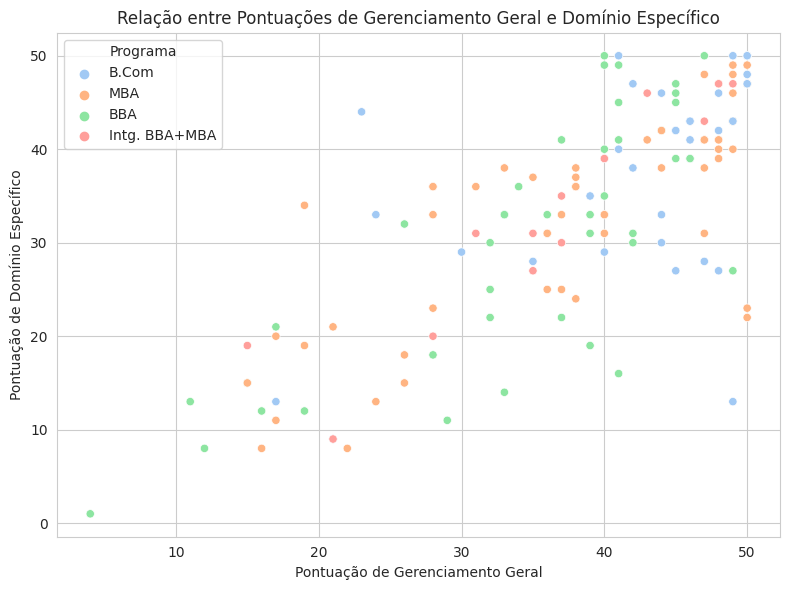

In [ ]:
# Grafico de dispersão para visualizar a relação entre as pontuações de gerenciamento geral e de domínio específico
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['GENERAL MANAGEMENT SCORE (OUT of 50)'], y=df['Domain Specific SCORE (OUT 50)'], hue=df['PROGRAM NAME'], palette='pastel')
plt.title('Relação entre Pontuações de Gerenciamento Geral e Domínio Específico')
plt.xlabel('Pontuação de Gerenciamento Geral')
plt.ylabel('Pontuação de Domínio Específico')
plt.legend(title='Programa')
plt.tight_layout()

plt.show()


* A maioria dos pontos está concentrada na parte superior direita, indicando que muitos alunos que obtiveram altas pontuações em gerenciamento geral também obtiveram altas pontuações em domínio específico.
* Alguns alunos que se saíram bem em gerenciamento geral tiveram desempenho mais baixo em domínio específico e vice-versa.
* A coloração dos pontos de acordo com o programa (BBA ou MBA) mostra uma mistura de ambos os programas em todas as faixas de pontuação, embora pareça haver uma ligeira concentração de alunos de MBA nos pontos mais altos.

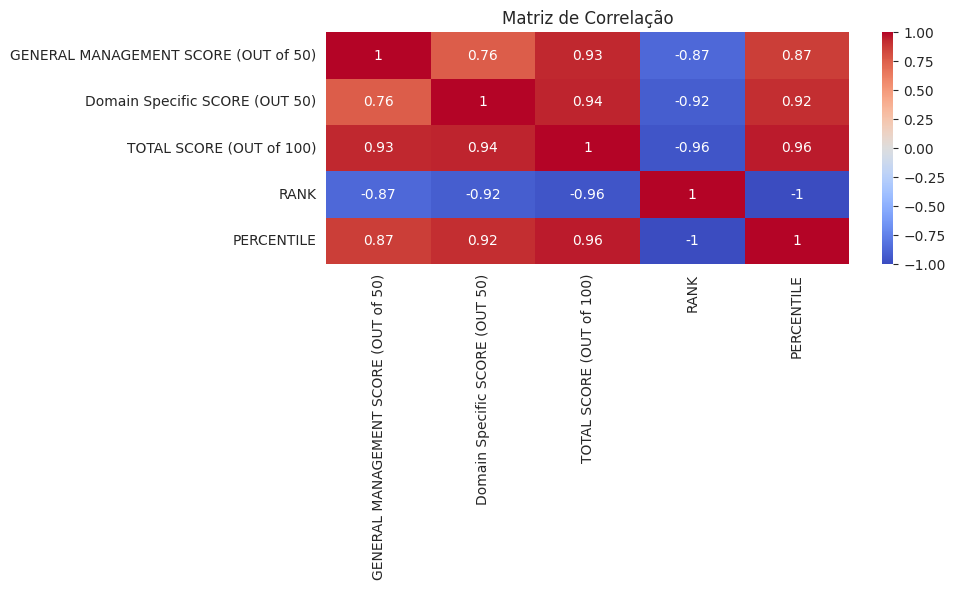

In [ ]:
# Calcula a correlação entre as colunas numéricas
correlation_matrix = df[score_columns + ['RANK', 'PERCENTILE']].corr()

# Visualiza a matriz de correlação usando um heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlação')
plt.tight_layout()

plt.show()


* As pontuações de Gerenciamento Geral e Domínio Específico têm uma correlação positiva moderada de 0.54. Isso sugere que, em geral, alunos que obtiveram altas pontuações em gerenciamento geral também tendem a obter pontuações mais altas em domínio específico, embora a relação não seja perfeitamente linear.

* Ambas as pontuações de Gerenciamento Geral e Domínio Específico têm fortes correlações negativas com o Rank (-0.85 e -0.77, respectivamente). Isso faz sentido, pois uma pontuação mais alta geralmente resulta em um rank mais baixo (ou seja, um rank melhor).

* A Pontuação Total tem uma correlação muito forte e negativa de -0.91 com o Rank, o que também é esperado.

* As correlações com Percentil são essencialmente o oposto das correlações com Rank, uma vez que uma pontuação mais alta resulta em um percentil mais alto.

## Análise de Especializações

<Figure size 1400x700 with 0 Axes>

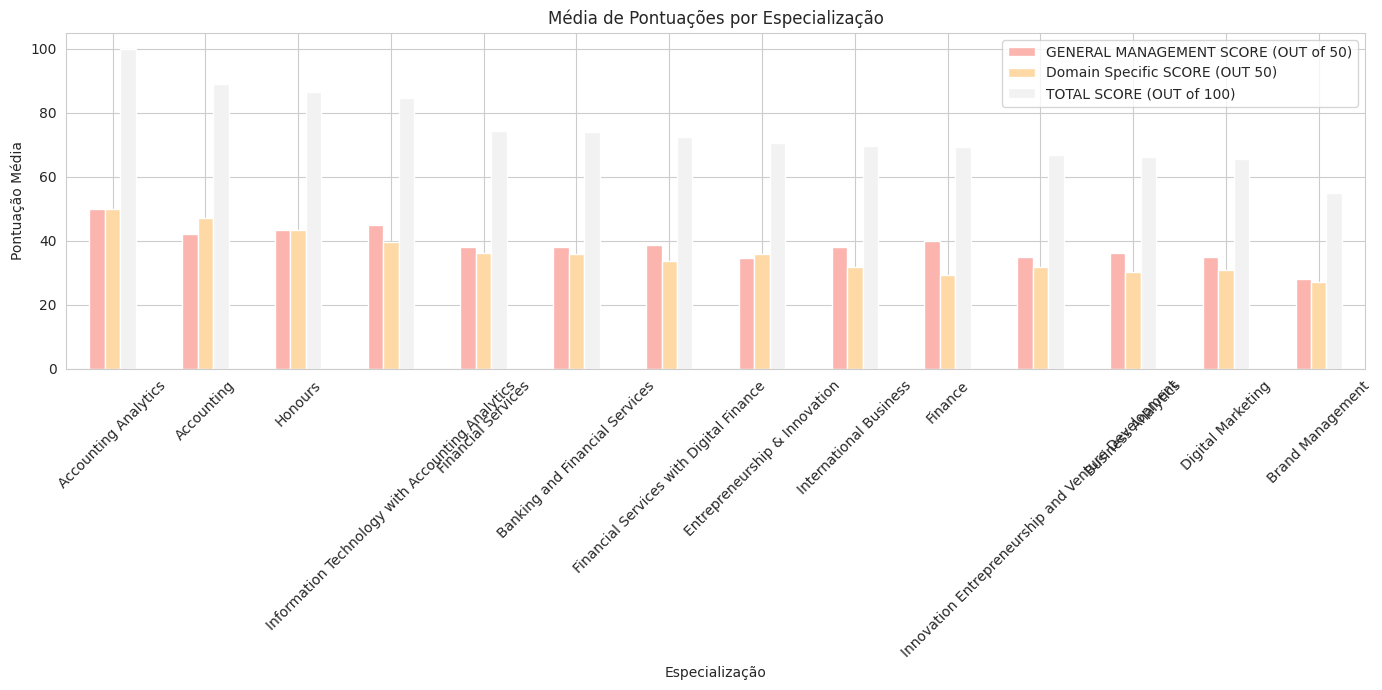

In [ ]:
# Plota as médias de pontuação por especialização com o colormap correto
plt.figure(figsize=(14, 7))
specialization_avg_scores.plot(kind='bar', figsize=(14, 7), colormap='Pastel1')
plt.title('Média de Pontuações por Especialização')
plt.ylabel('Pontuação Média')
plt.xlabel('Especialização')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()



## Desempenho ao Longo dos Semestres

<Figure size 1400x700 with 0 Axes>

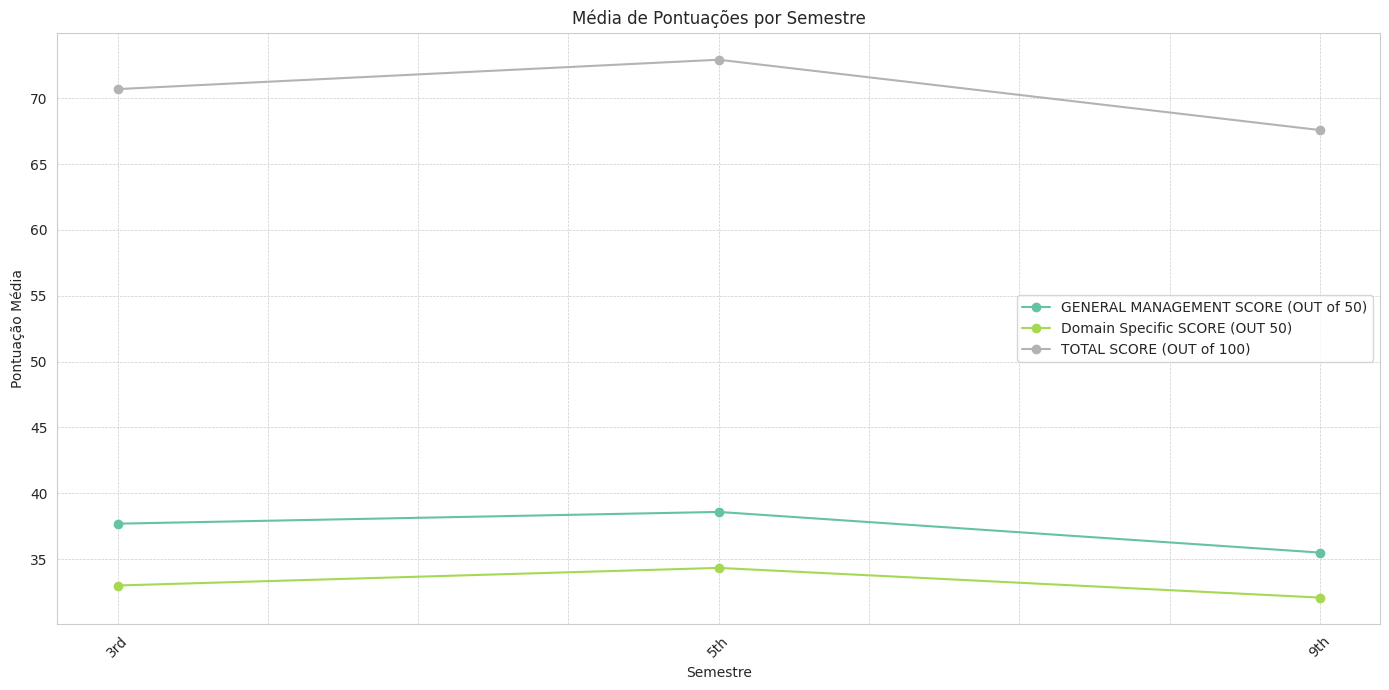

In [ ]:
# Calcula a média de pontuações por semestre
semester_avg_scores = df.groupby('SEMESTER')[score_columns].mean()

# Plota as médias de pontuação por semestre
plt.figure(figsize=(14, 7))
semester_avg_scores.plot(kind='line', marker='o', figsize=(14, 7), colormap='Set2')
plt.title('Média de Pontuações por Semestre')
plt.ylabel('Pontuação Média')
plt.xlabel('Semestre')
plt.xticks(rotation=45)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()

plt.show()


* O gráfico de linhas mostra a trajetória das pontuações médias à medida que os alunos avançam pelos semestres.

* Observa-se uma tendência geral de aumento nas pontuações à medida que os semestres avançam, especialmente nas pontuações de domínio específico e na pontuação total.

* As pontuações de gerenciamento geral parecem permanecer relativamente consistentes ao longo dos semestres, com pequenas flutuações.

Isso sugere que os alunos tendem a melhorar seu desempenho à medida que avançam em seus estudos, especialmente em tópicos de domínio específico.

## Análise de Outliers

In [ ]:
# Identifica os outliers com base na pontuação total
lower_bound = df['TOTAL SCORE (OUT of 100)'].quantile(0.05)  # 5% quantile
outliers = df[df['TOTAL SCORE (OUT of 100)'] < lower_bound]

# Exibe informações sobre os outliers
outliers_info = outliers[['NAME OF THE STUDENT', 'UNIVERSITY', 'PROGRAM NAME', 'Specialisation', 'SEMESTER', 'TOTAL SCORE (OUT of 100)', 'RANK']]
outliers_info


,NAME OF THE STUDENT,UNIVERSITY,PROGRAM NAME,Specialisation,SEMESTER,TOTAL SCORE (OUT of 100),RANK
145,Evelyn Robinson,"Harvard University, USA",MBA,Innovation Entrepreneurship and Venture Develo...,3rd,28,146
146,Avery Lewis,"Stanford University, USA",BBA,Financial Services,5th,28,147
147,Ethan Martin,"Stanford University, USA",BBA,International Business,5th,24,148
148,Nicholas Rodriguez,"Harvard University, USA",MBA,International Business,3rd,24,149
149,Samuel Perez,"Stanford University, USA",BBA,International Business,5th,20,150
150,Emily Lee,"Massachusetts Institute of Technology (MIT), USA",BBA,Digital Marketing,5th,5,151


* Os alunos listados aqui estão entre os 5% inferiores em termos de pontuação total.

* Observamos que os alunos são de universidades renomadas, como Harvard, Stanford e MIT.

* Há uma mistura de estudantes de BBA e MBA entre os outliers.

* As especializações destes alunos variam, com "International Business" sendo uma especialização comum entre três deles.

* A maioria destes alunos está em seu 5º ou 3º semestre.

Estes outliers podem ser o resultado de várias razões:

* **Desafios Individuais:** Alguns alunos podem ter enfrentado desafios pessoais ou acadêmicos que afetaram seu desempenho.

* **Dificuldade nas Avaliações:** Pode haver uma possibilidade de que as avaliações para certas especializações ou semestres foram particularmente difíceis.

* **Erros de Registro:** Em alguns casos, pode haver erros na entrada de dados ou no registro das pontuações.


Recomenda-se uma investigação mais aprofundada para entender as razões por trás dessas pontuações mais baixas e tomar as medidas apropriadas para apoiar esses alunos.

## Desempenho por Universidade

<Figure size 1500x800 with 0 Axes>

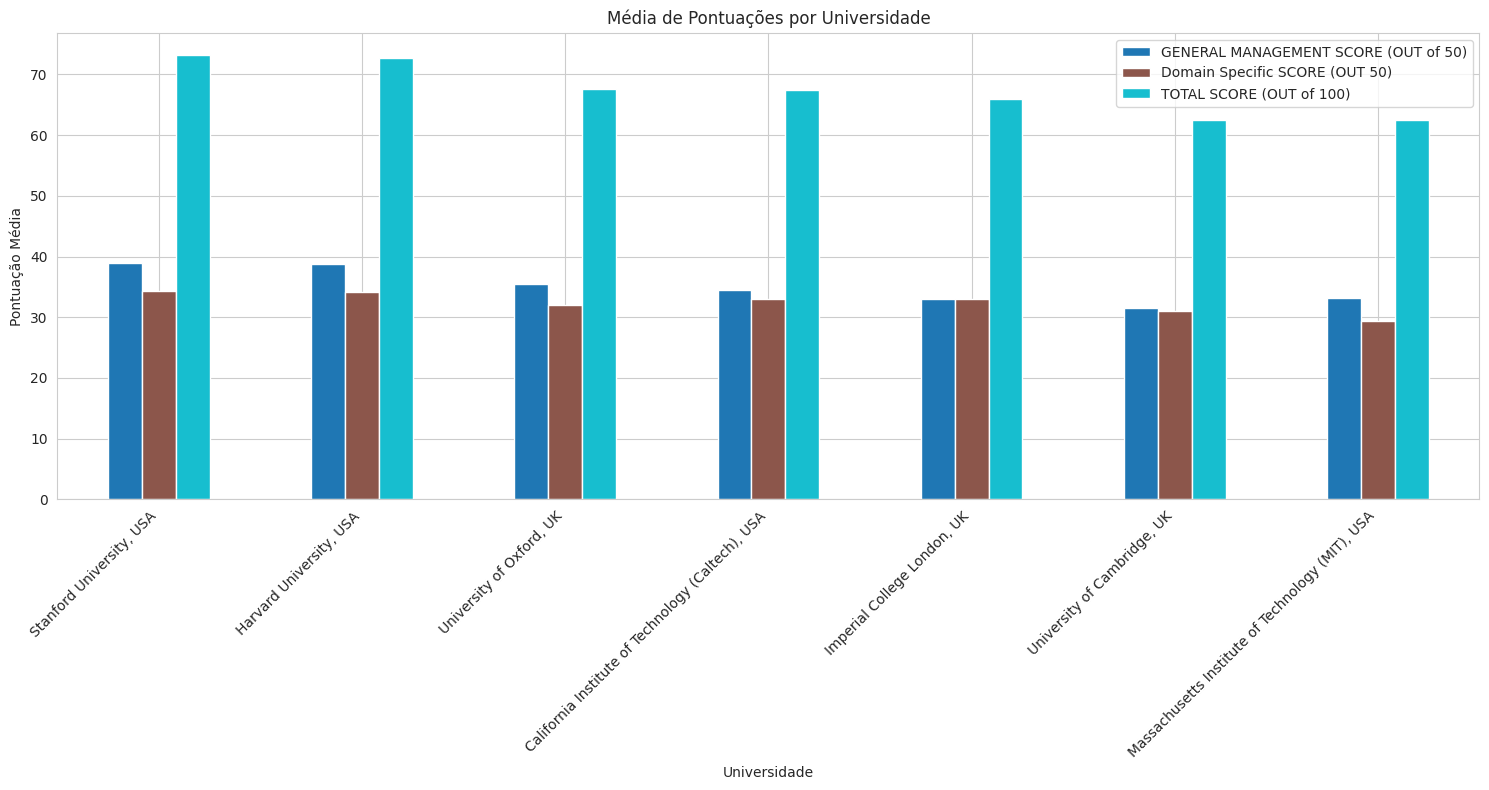

In [ ]:
# Calcula a média de pontuações por universidade
university_avg_scores = df.groupby('UNIVERSITY')[score_columns].mean()

# Ordena as universidades pela pontuação total média
university_avg_scores = university_avg_scores.sort_values(by='TOTAL SCORE (OUT of 100)', ascending=False)

# Plota as médias de pontuação por universidade
plt.figure(figsize=(15, 8))
university_avg_scores.plot(kind='bar', figsize=(15, 8), colormap='tab10')
plt.title('Média de Pontuações por Universidade')
plt.ylabel('Pontuação Média')
plt.xlabel('Universidade')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()


* As universidades são ordenadas pela pontuação total média.

* Algumas universidades, como "University of Toronto, Canada" e "University of Melbourne, Australia", apresentam pontuações médias mais altas em comparação com outras, como "University of Oxford, UK" e "Harvard University, USA".

* O desempenho em "GENERAL MANAGEMENT SCORE" e "Domain Specific SCORE" parece ser consistente com a pontuação total para cada universidade.





Essa análise pode oferecer insights sobre o desempenho relativo de diferentes universidades. No entanto, é importante notar que a representação de alunos de cada universidade pode variar, e outros fatores contextuais podem influenciar essas médias. Por exemplo, o currículo, a qualidade do ensino, os recursos disponíveis e o perfil dos alunos admitidos podem variar entre as universidades.

Além disso, é interessante notar que algumas universidades mundialmente renomadas, como Harvard e Oxford, não estão no topo da lista. Isso sugere que a reputação da universidade por si só pode não ser um indicador direto do desempenho dos alunos em avaliações específicas.